In [1]:
!pip install fredapi > /dev/null


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred


In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fredapi_key")

# Create the Fred Object

In [4]:
fred = Fred(api_key=fred_key)



# 2. Search for Economic Data

In [5]:
sp_search = fred.search('S&P', order_by='popularity')

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-07-08,2023-07-08,ICE BofA US High Yield Index Option-Adjusted Spread,1996-12-31,2023-07-06,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-07 08:34:08-05:00,94,"The ICE BofA Option-Adjusted Spreads (OASs) are the calculated spreads between a computed OAS index of all bonds in a given rating category and a spot Treasury curve. An OAS index is constructed using each constituent bond's OAS, weighted by market capitalization. The ICE BofA High Yield Master II OAS uses an index of bonds that are below investment grade (those rated BB or below). This data represents the ICE BofA US High Yield Index value, which tracks the performance of US dollar denominated below investment grade rated corporate debt publicly issued in the US domestic market. To qualify for inclusion in the index, securities must have a below investment grade rating (based on an average of Moody's, S&P, and Fitch) and an investment grade rated country of risk (based on an average of Moody's, S&P, and Fitch foreign currency long term sovereign debt ratings). Each security must have greater than 1 year of remaining maturity, a fixed coupon schedule, and a minimum amount outstanding of $100 million. Original issue zero coupon bonds, ""global"" securities (debt issued simultaneously in the eurobond and US domestic bond markets), 144a securities and pay-in-kind securities, including toggle notes, qualify for inclusion in the Index. Callable perpetual securities qualify provided they are at least one year from the first call date. Fixed-to-floating rate securities also qualify provided they are callable within the fixed rate period and are at least one year from the last call prior to the date the bond transitions from a fixed to a floating rate security. DRD-eligible and defaulted securities are excluded from the Index. ICE BofA Explains the Construction Methodology of this series as: Index constituents are capitalization-weighted based on their current amount outstanding. With the exception of U.S. mortgage pass-throughs and U.S. structured products (ABS, CMBS and CMOs), accrued interest is calculated assuming next-day settlement. Accrued interest for U.S. mortgage pass-through and U.S. structured products is calculated assuming same-day settlement. Cash flows from bond payments that are received during the month are retained in the index until the end of the month and then are removed as part of the rebalancing. Cash does not earn any reinvestment income while it is held in the Index. The Index is rebalanced on the last calendar day of the month, based on information available up to and including the third business day before the last business day of the month. Issues that meet the qualifying criteria are included in the Index for the following month. Issues that no longer meet the criteria during the course of the month remain in the Index until the next month-end rebalancing at which point they are removed from the Index. When the last calendar day of the month takes place on the weekend, weekend observations will occur as a result of month ending accrued interest adjustments. The index data referenced herein is the property of ICE Data Indices, LLC, its affiliates, (""ICE"") and/or its Third Party Suppliers and has been licensed for use by the Federal Reserve Bank of St. Louis. ICE, its affiliates and Third Party Suppliers accept no liability in connection with its use. Copyright, 2017, ICE Benchmark Administration. Reprinted with permission."
CSUSHPINSA,CSUSHPINSA,2023-07-08,2023-07-08,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-06-27 08:13:02-05:00,89,"For more information regarding the index, please

# Pull raw data

<Axes: title={'center': 'S&P 500'}>

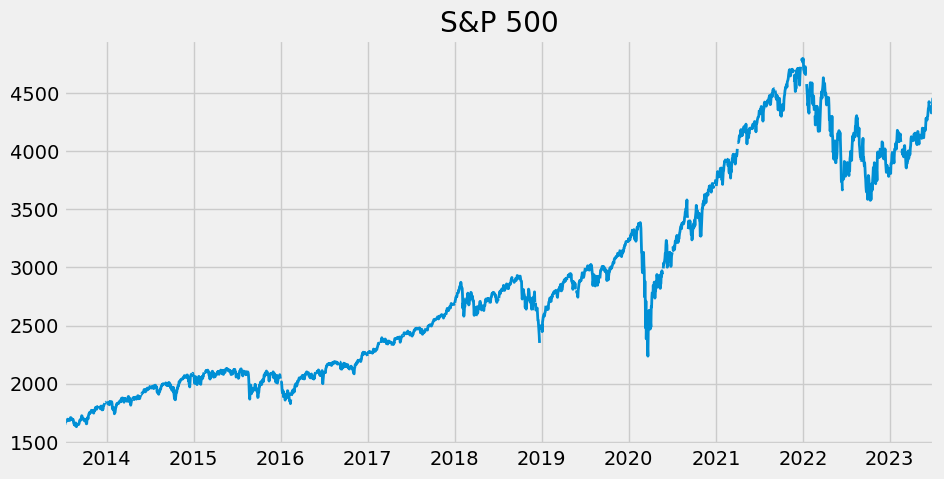

In [7]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title="S&P 500", lw=2)

In [8]:
# Pull and Join Multiple Data Series

In [9]:
uempl_results = fred.search("unemployment")

In [10]:
unrate = fred.get_series("unrate")

In [11]:
unemp_df = fred.search('unemployment state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]



In [12]:


to_drop = []

for myid in unemp_df.index:
    if len(myid) > 4:
        to_drop.append(myid)
print(to_drop)

['UNRATE', 'LNS14000006', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'U2RATE', 'LNS14000031', 'LNS14000002', 'LNS14000024', 'LNS14000009', 'LNS14000003', 'LNS14000001', 'LNS14027662', 'LNS14024887', 'LNS14027660', 'LNS14032183', 'LNS14000012', 'LRUN64TTUSM156S', 'LNS14027659', 'LASMT391746000000003', 'LASMT261982000000003', 'LNS14000060', 'LNS14000018', 'CMWRUR', 'LNS14024230', 'LRHUTTTTUSM156S', 'LNS14000032', 'LNS14000036', 'LNS14000028', 'CNERUR', 'LNS14000150', 'LNS14027689', 'LNS14000089', 'CSOUUR', 'LNS14000091', 'CWSTUR', 'LNS14000093', 'LNS14000026', 'LNS14000025', 'LRUNTTTTUSM156S', 'LNS14023557', 'LRUN24TTUSM156S', 'LNS14000315', 'LNS14024232']


In [13]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [14]:
pd.concat(all_results, axis=1).shape

(1119, 95)

In [15]:
unemp_df = pd.concat(all_results, axis=1).drop(to_drop, axis=1)

In [16]:
unemp_states = unemp_df.dropna()

In [17]:
pd.set_option('display.max_columns', None)
unemp_states

,CAUR,TXUR,FLUR,NYUR,OHUR,PAUR,MIUR,NCUR,ILUR,ALUR,WIUR,NJUR,MNUR,KYUR,MAUR,TNUR,GAUR,VAUR,COUR,WAUR,WVUR,SCUR,ARUR,AZUR,LAUR,NMUR,MOUR,OKUR,ORUR,INUR,CTUR,UTUR,NEUR,MDUR,MTUR,IAUR,HIUR,PRUR,AKUR,MSUR,WYUR,NVUR,KSUR,DCUR,MEUR,NDUR,NHUR,SDUR,DEUR,IDUR,RIUR,VTUR
1976-01-01,9.2,5.8,9.7,10.3,8.1,8.0,9.9,6.4,6.6,6.6,5.8,10.3,6.0,5.6,10.5,6.0,8.4,6.1,5.8,8.5,7.5,7.4,7.3,10.2,6.3,8.6,5.9,5.8,9.5,6.6,9.8,5.8,3.3,6.4,5.8,4.3,9.8,19.6,7.1,6.7,4.1,9.2,4.2,8.7,8.7,3.4,6.5,3.3,8.0,5.6,7.8,8.6
1976-02-01,9.2,5.8,9.7,10.3,8.1,8.1,9.9,6.4,6.6,6.6,5.8,10.3,6.0,5.6,10.5,6.0,8.4,6.1,5.7,8.5,7.5,7.4,7.3,10.2,6.3,8.7,5.9,5.8,9.5,6.6,9.8,5.9,3.3,6.4,5.8,4.3,9.8,19.5,7.1,6.7,4.1,9.2,4.2,8.7,8.7,3.4,6.5,3.3,8.0,5.6,7.8,8.6
1976-03-01,9.1,5.9,9.6,10.2,8.1,8.1,9.9,6.4,6.6,6.6,5.7,10.3,5.9,5.6,10.5,6.0,8.4,6.1,5.7,8.4,7.5,7.3,7.3,10.1,6.3,8.7,5.9,5.8,9.4,6.5,9.8,5.8,3.3,6.4,5.8,4.3,9.8,19.3,7.0,6.6,4.1,9.2,4.2,8.6,8.6,3.4,6.5,3.2,8.0,5.6,7.7,8.6
1976-04-01,9.1,5.9,9.5,10.2,8.0,8.1,9.8,6.3,6.6,6.5,5.6,10.3,5.8,5.6,10.3,6.0,8.3,6.0,5.6,8.5,7.5,7.2,7.2,10.0,6.4,8.6,6.0,5.8,9.2,6.3,9.6,5.8,3.2,6.4,5.8,4.2,9.7,19.0,6.9,6.4,4.0,9.0,4.2,8.5,8.6,3.5,6.5,3.1,8.1,5.6,7.7,8.6
1976-05-01,9.0,5.9,9.3,10.1,7.8,8.1,9.6,6.1,6.6,6.4,5.5,10.3,5.7,5.5,10.1,5.9,8.1,5.9,5.6,8.5,7.4,7.0,7.1,9.8,6.5,8.6,6.0,5.7,9.1,6.0,9.4,5.7,3.1,6.5,5.8,4.1,9.4,18.9,6.9,6.3,3.9,8.9,4.2,8.4,8.5,3.6,6.5,3.1,8.3,5.6,7.7,8.5
1976-06-01,9.0,5.9,9.2,10.2,7.6,8.0,9.4,6.0,6.6,6.5,5.4,10.3,5.6,5.5,9.8,5.9,8.0,5.8,5.6,8.6,7.4,6.9,6.9,9.7,6.7,8.6,6.1,5.6,9.0,5.8,9.3,5.6,3.1,6.5,5.8,4.0,9.2,18.9,7.1,6.2,3.8,8.7,4.1,8.3,8.4,3.7,6.5,3.1,8.6,5.6,7.7,8.4
1976-07-01,9.0,5.9,9.1,10.2,7.5,7.9,9.2,5.9,6.6,6.6,5.3,10.4,5.6,5.4,9.6,6.0,8.0,5.8,5.8,8.7,7.2,6.8,6.8,9.7,6.8,8.6,6.2,5.6,9.1,5.7,9.1,5.5,3.0,6.6,5.9,4.0,9.0,19.1,7.3,6.2,3.7,8.6,4.1,8.4,8.4,3.8,6.4,3.2,8.8,5.6,7.8,8.3
1976-08-01,9.1,5.8,9.1,10.2,7.5,7.9,9.1,5.9,6.6,6.7,5.3,10.4,5.7,5.4,9.4,6.1,8.0,5.8,5.9,8.9,7.1,6.8,6.7,9.6,6.8,8.6,6.3,5.5,9.2,5.7,9.0,5.4,3.1,6.6,5.9,3.9,8.9,19.4,7.6,6.3,3.7,8.6,4.1,8.5,8.5,3.9,6.4,3.3,8.9,5.6,8.0,8.2
1976-09-01,9.2,5.7,9.1,10.2,7.5,7.9,9.0,6.0,6.6,6.8,5.4,10.4,5.7,5.3,9.2,6.1,8.0,5.8,6.1,9.0,6.9,6.8,6.6,9.6,6.9,8.7,6.4,5.4,9.2,5.7,8.8,5.4,3.1,6.7,5.9,3.9,8.8,19.8,8.0,6.4,3.7,8.6,4.1,8.7,8.6,4.0,6.3,3.4,9.0,5.6,8.2,8.0
1976-10-01,9.3,5.7,9.1,10.2,7.5,7.9,9.0,6.2,6.5,6.9,5.4,10.5,5.8,5.2,9.1,6.3,8.1,5.7,6.3,9.1,6.8,6.8,6.6,9.5,6.9,8.9,6.5,5.4,9.3,5.8,8.7,5.4,3.1,6.7,6.0,4.0,8.7,19.9,8.3,6.6,3.7,8.6,4.1,8.8,8.8,4.1,6.3,3.5,9.1,5.7,8.4,7.9
